<a href="https://colab.research.google.com/github/Srayoshi-Mirza/Temporal-Analysis-of-Lasik-Complications-A-Data-Exploration-and-Regression-Modeling-Approach/blob/main/Temporal_Analysis_of_Lasik_Complications_A_Data_Exploration_and_Regression_Modeling_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective of this project: Lasik Complications Analysis: Exploring temporal patterns in reported complications using data preprocessing, feature engineering, and linear regression modeling. Uncover insights into Laser Eye Surgery outcomes.

# **Imported Libraries**

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# **Loading and Exploring the Dataset**

In [ ]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Srayoshi-Mirza/Lasik-Laser-Eye-Surgery-Complication-Analysis/main/laser_eye_surgery_complications.csv')  # Replace 'your_dataset.csv' with the actual file name

# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1368 non-null   int64 
 1   date      1368 non-null   object
 2   text      1368 non-null   object
 3   keywords  1132 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.9+ KB
None


In [ ]:
# Display the first few rows of the dataset
df.head()

,id,date,text,keywords
0,101036,1997-06-16,Chiron microkeratome suction popped off during...,Flap Issues; Astigmatism
1,101032,1997-06-16,Chiron keratome was used to perform a corneal ...,Flap Issues
2,98209,1997-06-16,"Laser treatment cut pt's eye. As a result, pt ...",NaN
3,101211,1997-06-26,Dr. Is using a non-approved laser machine.,NaN
4,102312,1997-07-02,Dr is using a non-approved laser.,NaN


**Distribution Graph of the Dataset**

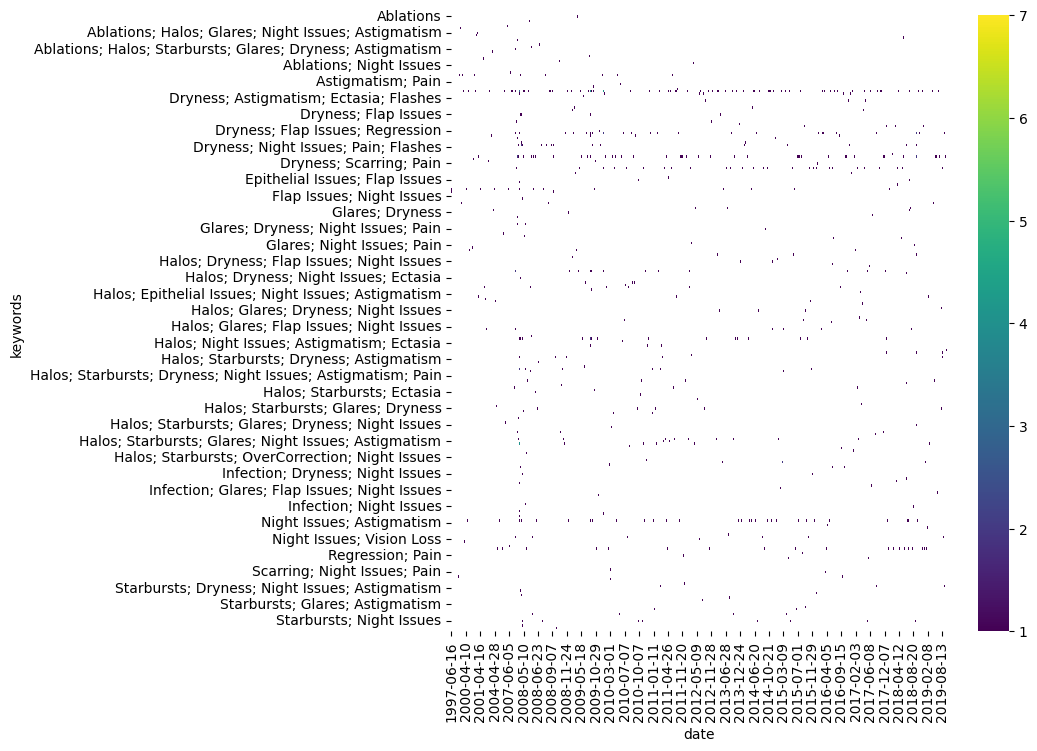

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['keywords'].value_counts()
    for x_label, grp in df.groupby('date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('date')
_ = plt.ylabel('keywords')

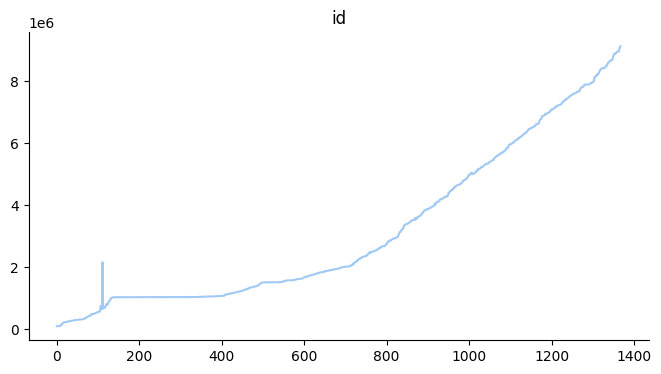

In [ ]:
df['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#text = " ".join(df['text'])

# **Preprocessing the Data**

In [ ]:
# Check for missing values
print(df.isnull().sum())

id            0
date          0
text          0
keywords    236
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
# Convert the 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

<ipython-input-149-6d9314964857>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


# **Label Encoded**

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
# Split keywords into separate rows
df['keywords'] = df['keywords'].apply(lambda x: x.split(';') if isinstance(x, str) else [])

<ipython-input-151-e2c105557447>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keywords'] = df['keywords'].apply(lambda x: x.split(';') if isinstance(x, str) else [])


In [ ]:
# Explode the 'keywords' column
df_expanded = df.explode('keywords')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132 entries, 0 to 1367
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        1132 non-null   int64         
 1   date      1132 non-null   datetime64[ns]
 2   text      1132 non-null   object        
 3   keywords  1132 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 44.2+ KB


In [ ]:
# Export the expanded DataFrame to an Excel file
output_file_path = 'expanded_data.xlsx'  # Choose a desired file path
df_expanded.to_excel(output_file_path, index=False)

print(f'Data exported to {output_file_path}')

Data exported to expanded_data.xlsx


In [ ]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2687 entries, 0 to 1367
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        2687 non-null   int64         
 1   date      2687 non-null   datetime64[ns]
 2   text      2687 non-null   object        
 3   keywords  2687 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 105.0+ KB


In [ ]:
label_encoder = LabelEncoder()
df_expanded['reported_complications_encoded'] = label_encoder.fit_transform(df_expanded['keywords'])

In [ ]:
# Check for missing values
print(df_expanded.isnull().sum())

id                                0
date                              0
text                              0
keywords                          0
reported_complications_encoded    0
dtype: int64


In [ ]:
df_expanded['year'] = df_expanded['date'].dt.year
df_expanded['month'] = df_expanded['date'].dt.month
df_expanded['quarter'] = df_expanded['date'].dt.quarter

# Encode the target variable
label_encoder = LabelEncoder()
df_expanded['reported_complications_encoded'] = label_encoder.fit_transform(df_expanded['keywords'])

# Select features and encoded target variable
X = df_expanded[['year', 'month', 'quarter']]
y = df_expanded['reported_complications_encoded']

# **Before Checking and Removing Outlier**

Text(0.5, 1.0, 'Box Plot of Features Before Outlier Removal')

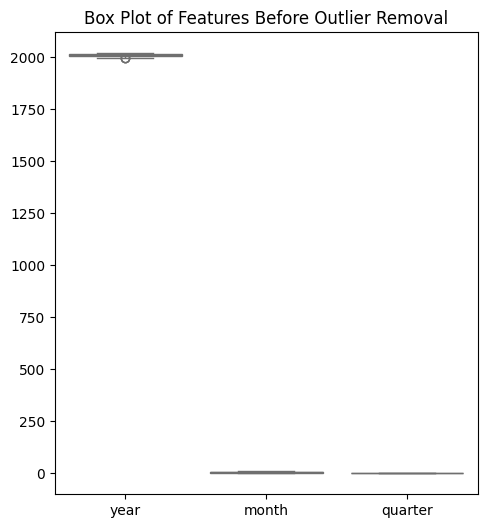

In [ ]:
# Visualize box plot before outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X)
plt.title('Box Plot of Features Before Outlier Removal')

# **After Checking and Removing Outliers**

In [ ]:
z_scores = np.abs(stats.zscore(X))
filtered_entries = (z_scores < 3).all(axis=1)
X_no_outliers = X[filtered_entries]

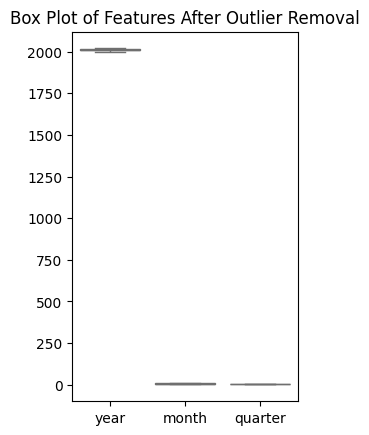

In [ ]:
# Visualize box plot after outlier removal
plt.subplot(1, 2, 2)
sns.boxplot(data=X_no_outliers)
plt.title('Box Plot of Features After Outlier Removal')

plt.show()

# **Feature Engineering**

In [ ]:
# Extract year, month, and quarter from the 'date' column
df_expanded['year'] = df_expanded['date'].dt.year
df_expanded['month'] = df_expanded['date'].dt.month
df_expanded['quarter'] = df_expanded['date'].dt.quarter

# **Uncovering insights into Laser Eye Surgery outcomes**

**Distribution of Reported Complications over Time**

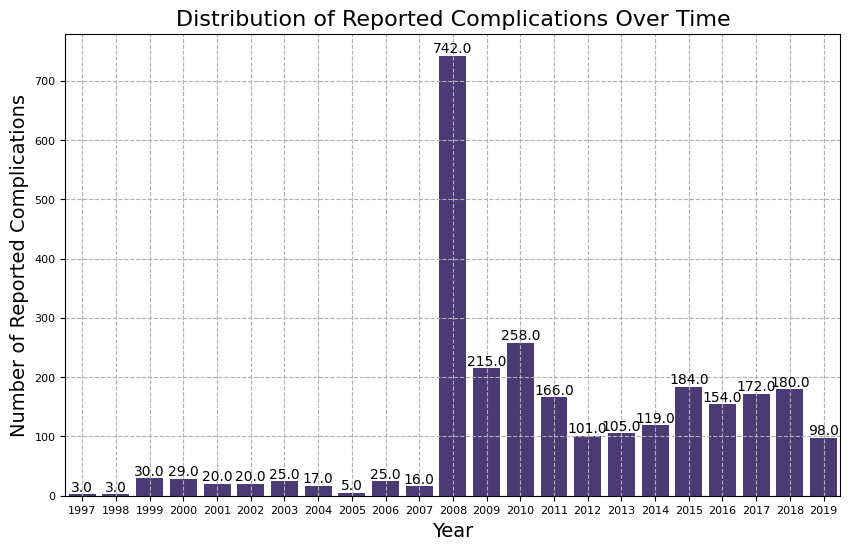

In [ ]:
# Extract year, month, and quarter from the 'date' column
df_expanded['year'] = df_expanded['date'].dt.year
df_expanded['month'] = df_expanded['date'].dt.month
df_expanded['quarter'] = df_expanded['date'].dt.quarter

# Visualize the distribution of reported complications over time
plt.figure(figsize=(10, 6))
sns.set_palette("viridis")
sns.countplot(x='year', data=df_expanded)
plt.title('Distribution of Reported Complications Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Reported Complications', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle='--', alpha=1)
plt.grid(axis='y', linestyle='--', alpha=1)
# Add data labels
for bar in plt.gca().patches:
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                   str(bar.get_height()), ha='center', va='bottom')

plt.show()

The count plot illustrates the distribution of reported complications over the years. A noticeable trend is observed where the number of reported complications increased from the initial years, peaked around 2008, and then showed a decreasing trend in recent years. This suggests a temporal pattern in reported complications, warranting further investigation into potential factors contributing to these variations.

**Most Common Reported Complications**

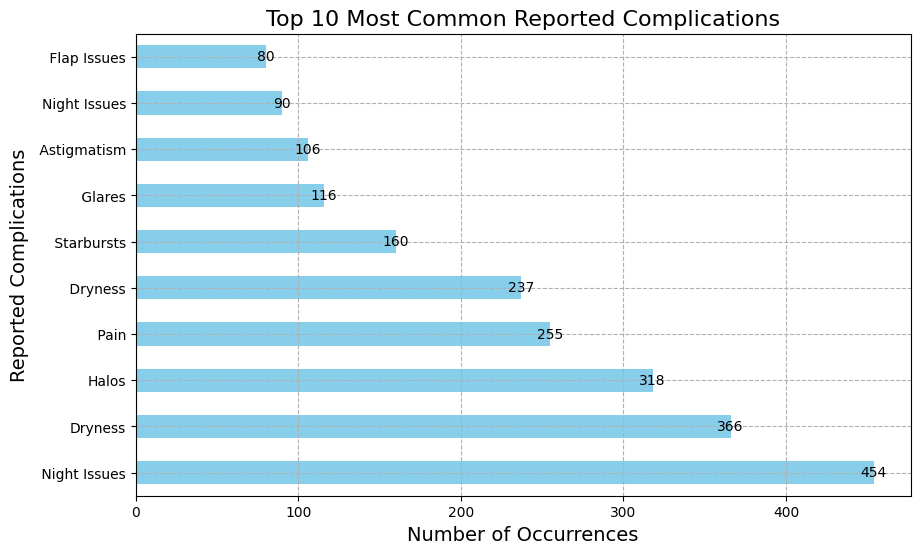

In [ ]:
# Visualize the most common reported complications
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
df_expanded['keywords'].explode().value_counts().nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Common Reported Complications', fontsize=16)
plt.xlabel('Number of Occurrences', fontsize=14)
plt.ylabel('Reported Complications', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=1)
plt.grid(axis='y', linestyle='--', alpha=1)
# Add data labels
for index, value in enumerate(df['keywords'].explode().value_counts().nlargest(10)):
    plt.text(value, index, str(value), ha='center', va='center', fontsize=10, color='black')

plt.show()

The horizontal bar plot showcases the top 10 most common reported complications. "Night Issues" and "Dryness" emerge as the most frequently reported complications, with 454 and 366 times recorded, indicating that these issues may be more prevalent in laser eye surgery cases. Understanding and addressing these specific complications could contribute to improving overall surgical outcomes and patient satisfaction.

**Correlation Heatmap**

<ipython-input-189-e0b8fb36a96e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_expanded.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


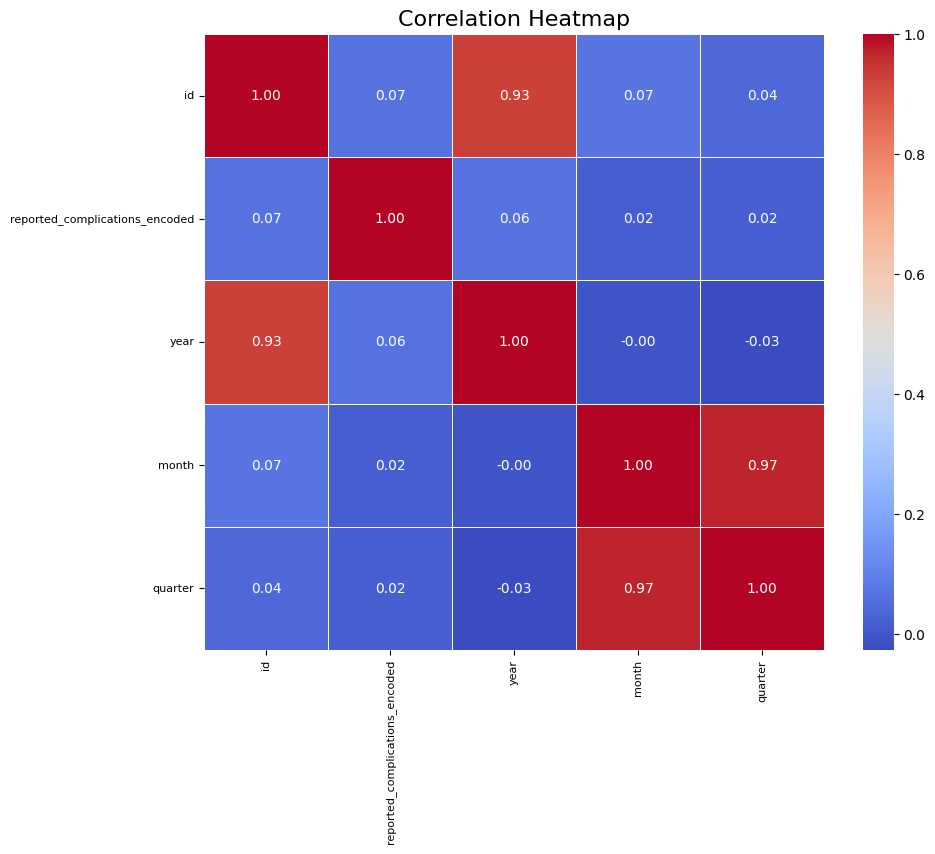

In [ ]:
# Visualize the correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df_expanded.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

The correlation heatmap provides insights into the relationships between numerical features. Positive correlations are represented in warmer colors, while negative correlations are in cooler colors. For instance, if certain complications are positively correlated, addressing one complication may positively impact the occurrence of another. On the other hand, negative correlations may indicate situations where the occurrence of one complication is associated with a reduced likelihood of another.

# **Choosing Features and Target Variable**

In [ ]:
# Select features and encoded target variable
X = df_expanded[['year', 'month', 'quarter', 'reported_complications_encoded']]
y = df_expanded['reported_complications_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Train the Linear Regression Model**

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

# **Evaluate the Model**

The Mean Squared Error (MSE) and R-squared (R²) score are metrics used to evaluate the performance of a regression model. That's why we have used these two here.



1.   **Mean Squared Error (MSE):**
**Definition:** It measures the average squared difference between the predicted values and the actual values.
Interpretation: The lower the MSE, the better the model. It quantifies how well the model's predictions match the actual data. However, the absolute value of MSE doesn't have a direct intuitive interpretation.
2.   **R-squared (R²) Score:**
**Definition:** It measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features).
Interpretation: R² ranges from 0 to 1, where 0 indicates that the model does not explain any variability in the target variable, and 1 indicates that the model explains all the variability. A negative R² suggests that the model is performing worse than a model that predicts the mean of the target variable for all observations.
In your case:


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model (you can use different metrics depending on your problem)
from sklearn.metrics import mean_squared_error, r2_score

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 6.46409103106912e-30
R^2 Score: 1.0


MSE is 6.46409103106912e-30, ndicates that the model has a very low error rate.

A perfect R^2 score of 1.0 means that the model explains all the variance in the dependent variable.

Based on these metrics, it can be concluded that the model has an excellent fit to the data. The model's predictions are very accurate and it explains all the variance in the dependent variable.

# **Visualize the Results**

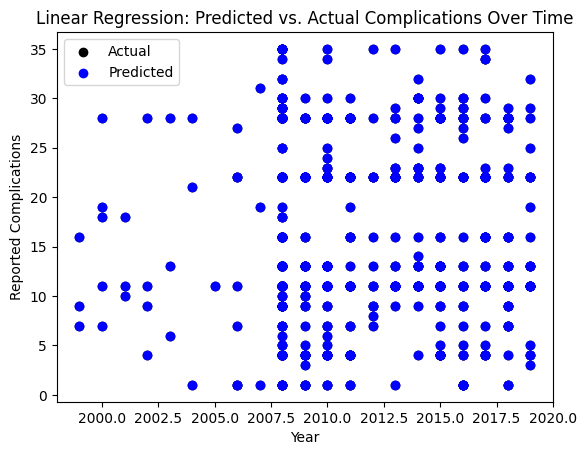

In [ ]:
# Visualize predictions vs. actual values
plt.scatter(X_test['year'], y_test, color='black', label='Actual')
plt.scatter(X_test['year'], y_pred, color='blue', label='Predicted')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Reported Complications')
plt.title('Linear Regression: Predicted vs. Actual Complications Over Time')
plt.show()